Carregar dependências

In [6]:
#install.packages(c("tidyverse","ggplot2", "corrplot", "scales", "data.table", "dplyr"))

library(tidyverse)
library(ggplot2)
library(corrplot)
library(scales)
library(data.table)
library(dplyr)


Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded
Warning message:
"package 'scales' was built under R version 3.6.3"
Attaching package: 'scales'

The following object is mas

Importar dados

In [7]:
# Adicionando o diretorio atual
setwd("./")

# Importando dados
base <- read.csv(
  file="./summer-products-with-rating-and-performance_2020-08.csv",
  header=TRUE,
  sep=","
)

base_filtrada <- base[c("title_orig", "price", "units_sold", "rating", "rating_count", "retail_price", "merchant_rating", "merchant_rating_count", "tags")]

colnames(base_filtrada)[0] <- "Nome"
colnames(base_filtrada)[1] <- "Produto"
colnames(base_filtrada)[2] <- "Preco_do_Produto"
colnames(base_filtrada)[3] <- "Unidades_Vendidas"
colnames(base_filtrada)[4] <- "Media_da_Nota_do_Produto"
colnames(base_filtrada)[5] <- "Quantidade_de_Avaliacoes"
colnames(base_filtrada)[6] <- "Preco_de_Varejo"
colnames(base_filtrada)[7] <- "Media_de_Nota_do_Vendedor"
colnames(base_filtrada)[8] <- "Quantidade_de_Avaliações_do_Vendedor"

Renomar colunas (tirar caracteres especiais)

Higienização: considerar apenas produtos com exatamente 1000 unidades vendidas. A ideia aqui é comparar produtos com escalas semelhantes. Usar um conjunto de dados muito grande prejudica a visualização dos clusters no dendograma.

In [8]:
subbase<-base_filtrada[(base_filtrada$Unidades_Vendidas==1000),]
subbase <- as.data.frame((subbase))
subbase<-slice_head(subbase, n = 30)
nrow(subbase)

[1] 30

Padronização das variáveis na mesma escala

In [9]:
base_e <- scale(subbase[, c("Preco_do_Produto", "Media_da_Nota_do_Produto", "Media_de_Nota_do_Vendedor")], center = FALSE, scale = TRUE)
base_e <- as.data.frame((base_e))

# Construção da matriz de correlação da base que será aplicada ao método

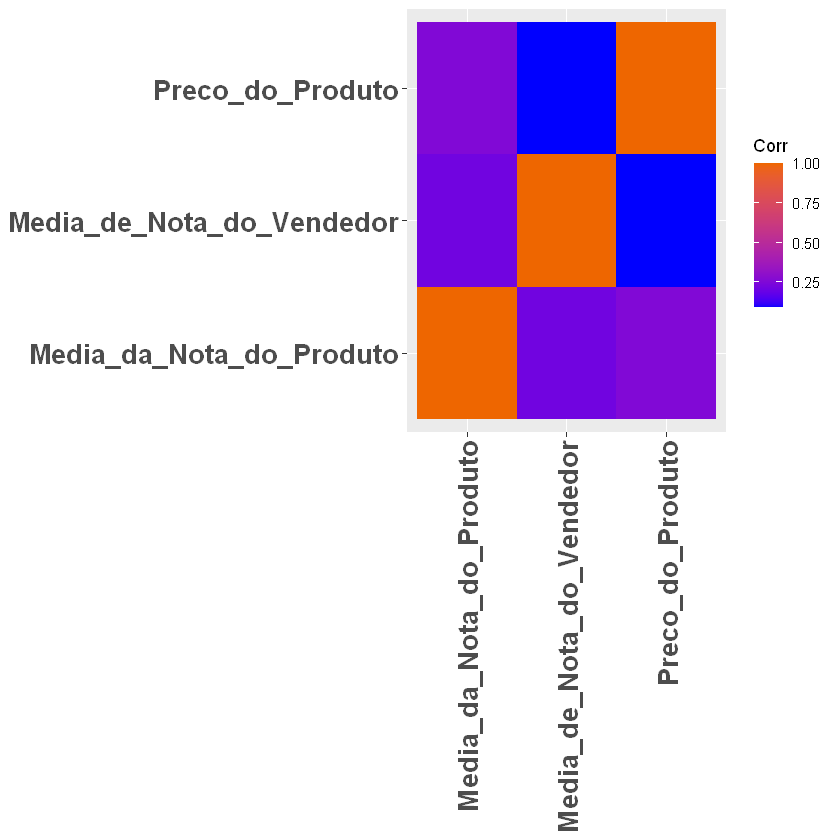

In [10]:
# Mapa de calor de correlacao
cor_map = data.frame(rows = rep(colnames(base_e), each = ncol(base_e)), cols = rep(colnames(base_e), each = 1, times=ncol(base_e)), Corr = c(cor(base_e)), stringsAsFactors=FALSE)

cor_heat = ggplot(cor_map, aes(rows, cols)) + geom_tile(aes(fill = Corr)) 
cor_heat = cor_heat + scale_fill_gradient(low = "#0000FF", high = "#EE6600") + theme(axis.title.y=element_blank(), axis.title.x=element_blank(), axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=16, face="bold"), axis.text.y = element_text(vjust = 0.5, hjust=1, size=16, face="bold"))
cor_heat

In [51]:
cor(base_e)

,Preco_do_Produto,Media_da_Nota_do_Produto,Media_de_Nota_do_Vendedor
Preco_do_Produto,1.00000000,0.2611090,0.09620484
Media_da_Nota_do_Produto,0.26110903,1.0000000,0.21717874
Media_de_Nota_do_Vendedor,0.09620484,0.2171787,1.00000000


### Construção da Matriz de Distâncias

Considerando aqui apenas 30 produtos, dentre os 405 selecionados na higienização

In [11]:
dj <- dist(base_e)

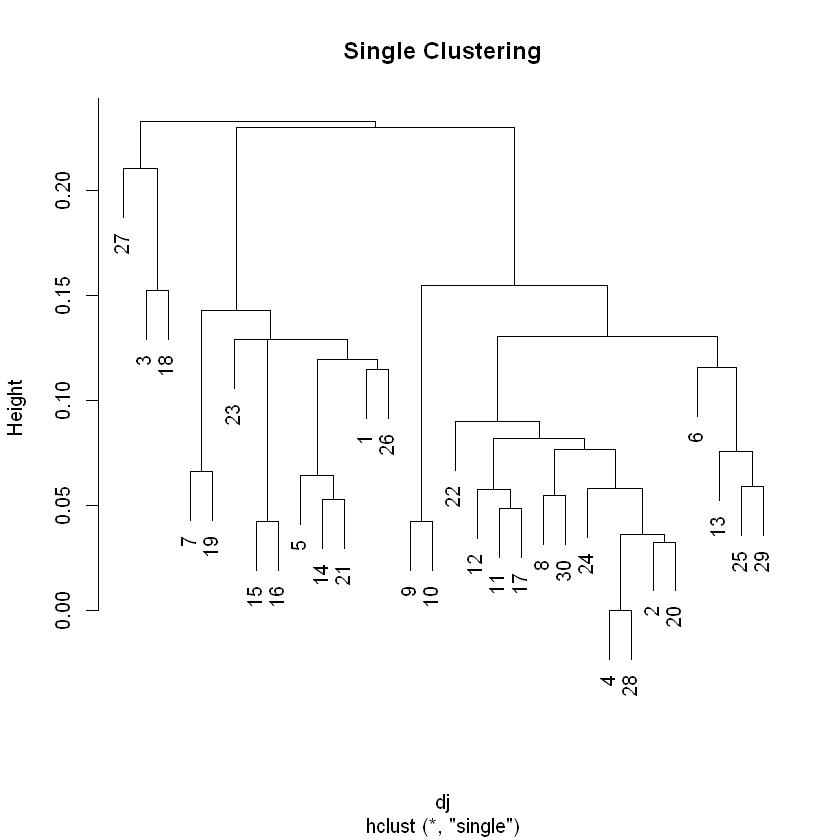

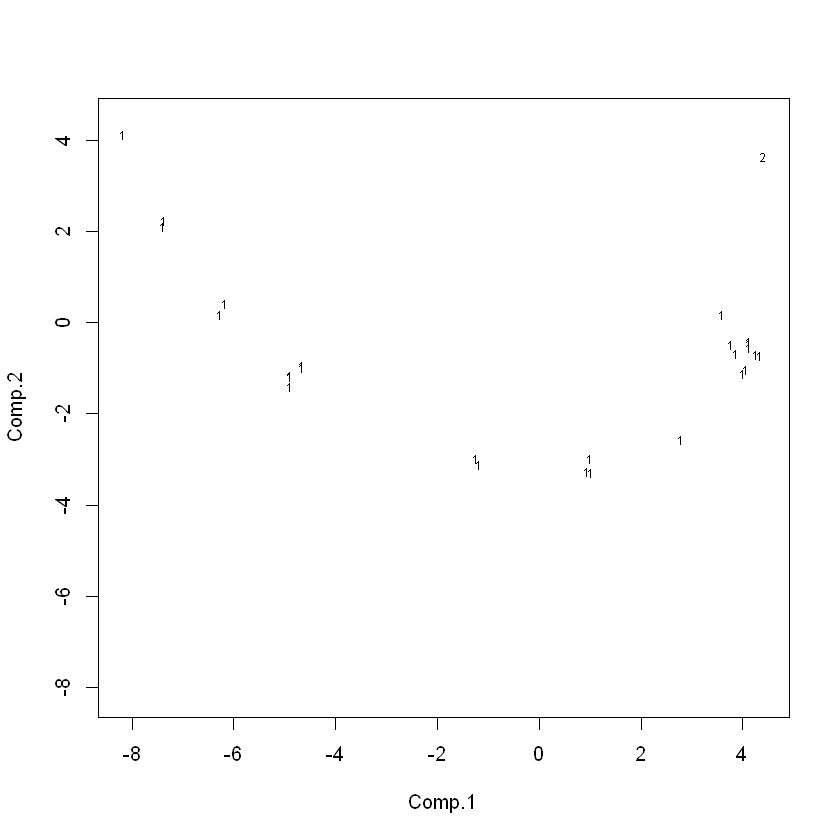

In [12]:
plot(cs <- hclust(dj, method='single'), main = "Single Clustering")

body_pc <- princomp(dj, cor = TRUE)
xlim <- range(body_pc$scores[,1])
plot(body_pc$scores[,1:2], type = "n", xlim = xlim, ylim = xlim)
lab <- cutree(cs, k=2)
text(body_pc$scores[,1:2], labels = lab, cex = 0.6)

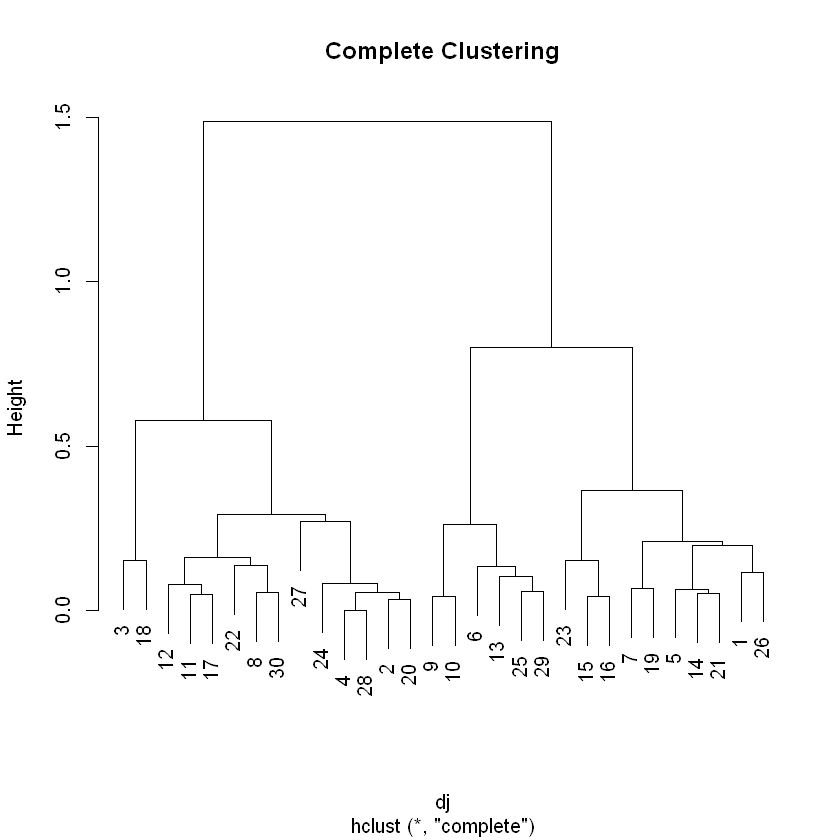

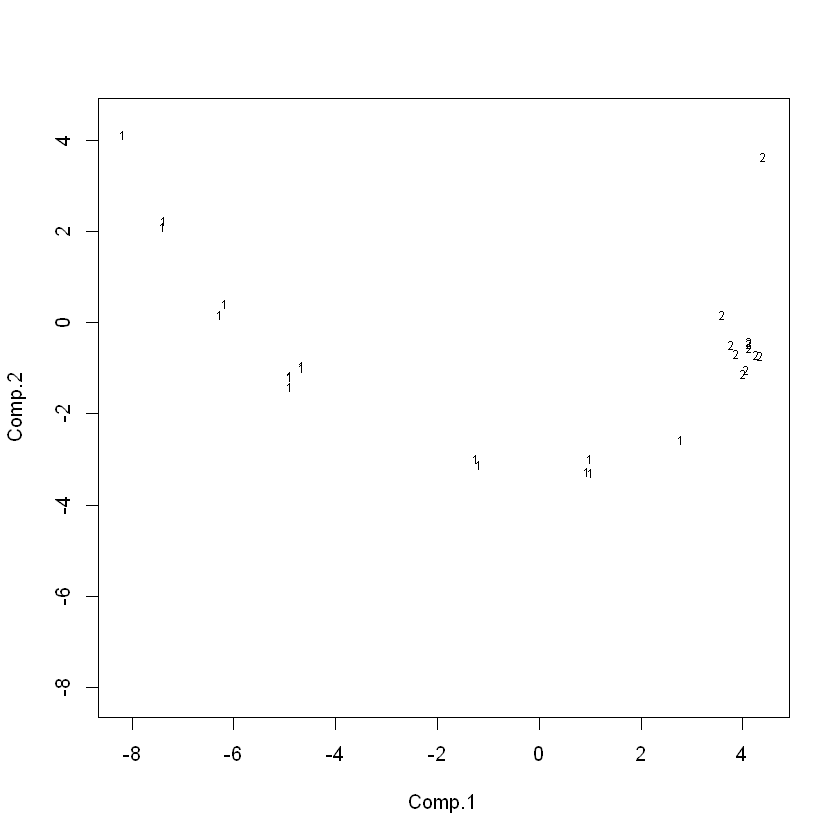

In [67]:
plot(cc <- hclust(dj, method='complete'), main = "Complete Clustering")

body_pc <- princomp(dj, cor = TRUE)
xlim <- range(body_pc$scores[,1])
plot(body_pc$scores[,1:2], type = "n", xlim = xlim, ylim = xlim)
lab <- cutree(cc, k=2)
text(body_pc$scores[,1:2], labels = lab, cex = 0.6)

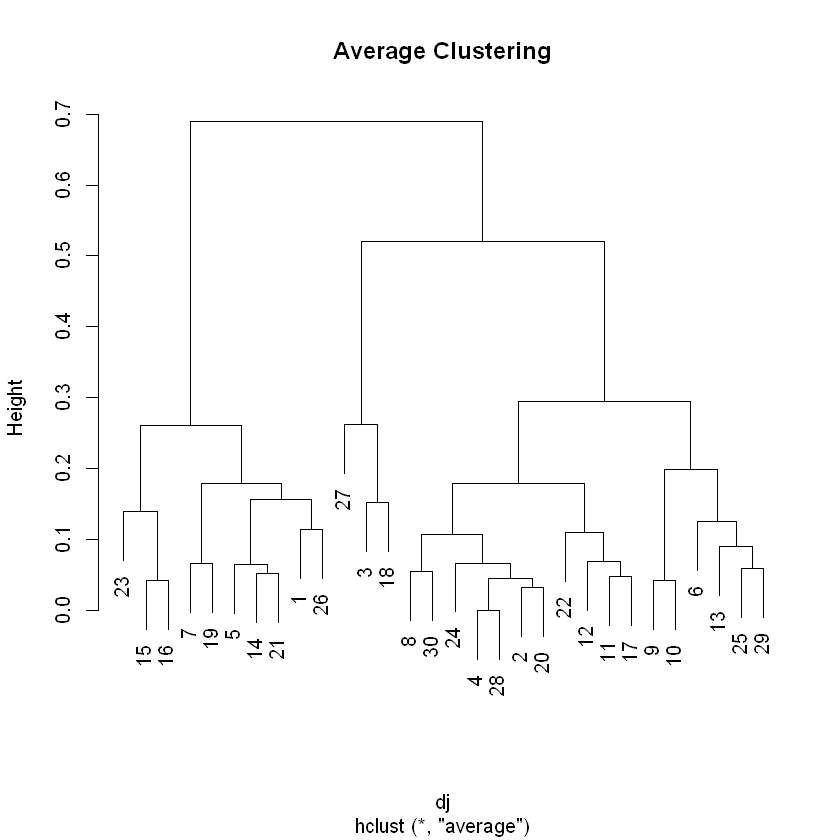

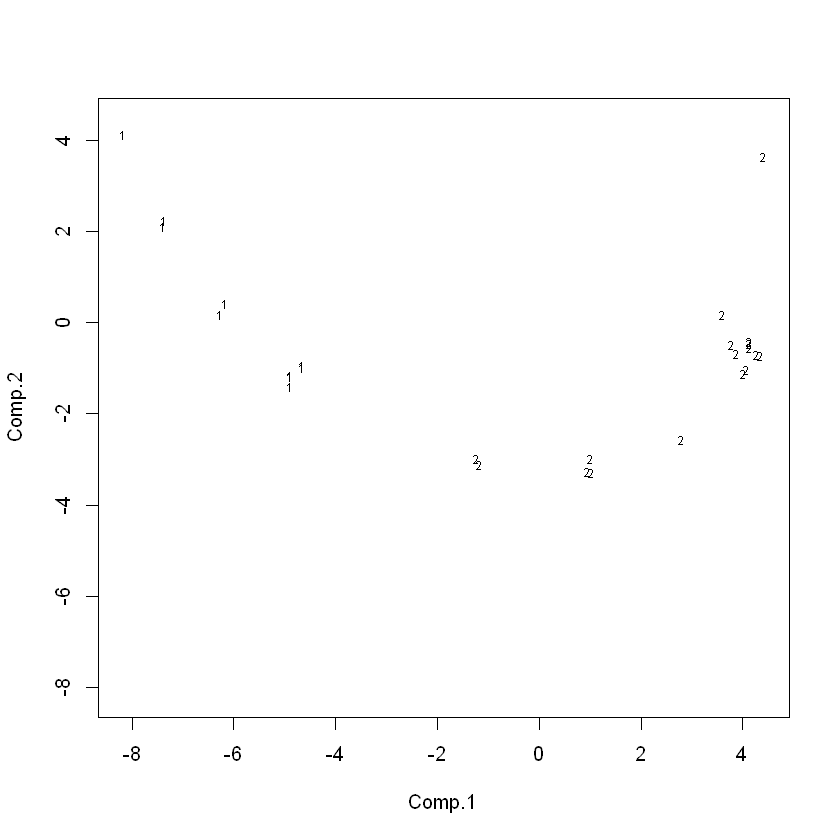

In [13]:
plot(ca <- hclust(dj, method='average'), main = "Average Clustering")

body_pc <- princomp(dj, cor = TRUE)
xlim <- range(body_pc$scores[,1])
plot(body_pc$scores[,1:2], type = "n", xlim = xlim, ylim = xlim)
lab <- cutree(ca, k=2)
text(body_pc$scores[,1:2], labels = lab, cex = 0.6)